In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stock-prices/stock prices.csv


In [2]:
stock_data = pd.read_csv("../input/stock-prices/stock prices.csv")

In [3]:
stock_data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
stock_data.shape

(497472, 7)

# Data Cleaning

In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [6]:
stock_data.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

**There are a few missing values in the open, high and low columns (all float64).**

In [7]:
stock_data.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


open       7.440827
high       7.429748
low        7.452458
close      7.441782
volume    10.322315
dtype: float64

**All the open, high and low columns are skewed so replacing the missing values with their respective medians would be a good choice but we don't need to impute the missing values. Some values may be missing because a stock wasn't part of the S&P 500 on that date.**

# Data Visualization and Analysis

**Question 1: Which date in the sample saw the largest overall trading volume? On that date, which two stocks were traded most?**

In [8]:
stock_data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [9]:
DateSum = stock_data.groupby('date').sum() # Finding overall sum of each date.

# Checking which date has maximum volume.
DateSum['volume'][[DateSum['volume'].idxmax()]]

date
2015-08-24    4607945196
Name: volume, dtype: int64

In [10]:
HighestTraded = stock_data.loc[stock_data['date']=='2015-08-24']
HighestTraded

,symbol,date,open,high,low,close,volume
201208,AAL,2015-08-24,36.00,39.8999,34.10,37.62,19612661
201209,AAPL,2015-08-24,94.87,108.8000,92.00,103.12,162206292
201210,AAP,2015-08-24,173.26,178.6950,151.30,173.75,1464478
201211,ABBV,2015-08-24,61.17,64.8500,53.87,63.45,24292618
201212,ABC,2015-08-24,93.00,100.8500,91.48,98.53,4569825
...,...,...,...,...,...,...,...
201695,XYL,2015-08-24,30.49,31.9200,29.90,30.91,2479069
201696,YUM,2015-08-24,73.89,78.9900,71.39,77.19,10431594
201697,ZBH,2015-08-24,101.11,102.0000,94.73,99.57,2782148
201698,ZION,2015-08-24,26.73,27.8600,26.42,26.93,5879152


In [11]:
SymbolSum = HighestTraded.groupby('symbol').sum()
SymbolSum

,open,high,low,close,volume
symbol,,,,,
A,33.87,36.0100,33.57,34.68,4114990
AAL,36.00,39.8999,34.10,37.62,19612661
AAP,173.26,178.6950,151.30,173.75,1464478
AAPL,94.87,108.8000,92.00,103.12,162206292
ABBV,61.17,64.8500,53.87,63.45,24292618
...,...,...,...,...,...
XYL,30.49,31.9200,29.90,30.91,2479069
YUM,73.89,78.9900,71.39,77.19,10431594
ZBH,101.11,102.0000,94.73,99.57,2782148


In [12]:
SymbolSum.sort_values('volume',ascending=False).head()

,open,high,low,close,volume
symbol,,,,,
BAC,15.02,15.98,14.60,15.29,214649482
AAPL,94.87,108.80,92.00,103.12,162206292
GE,22.84,24.38,19.37,23.87,91236502
MSFT,40.45,43.31,39.72,41.68,88753660
FB,77.03,87.14,72.00,82.09,83710727


**As we can see, 2015-08-24 saw the largest overall trading volume and BAC and AAPL were the two most traded stocks of the day.**

**Question 2: On which day of the week does volume tend to be highest? Lowest?**

In [13]:
stock_data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [14]:
# First we have to convert date column to date-time    
stock_data['date'] = pd.to_datetime(stock_data['date'])

In [15]:
#Then we find day of the week for each date and add it to a column
stock_data['day'] = stock_data['date'].dt.dayofweek
stock_data.head()

,symbol,date,open,high,low,close,volume,day
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,3
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,3
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711,3
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061,3
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391,3


In [16]:
# Group each day and find volume mean
DayMean = stock_data.groupby('day').mean() 
DayMean

,open,high,low,close,volume
day,,,,,
0,86.316806,87.082099,85.533313,86.322181,4.031172e+06
1,86.251125,87.022208,85.469677,86.271991,4.188689e+06
2,86.375931,87.173239,85.556928,86.415754,4.298572e+06
3,86.307541,87.113141,85.486302,86.324814,4.299304e+06
4,86.510280,87.270889,85.717814,86.509309,4.435782e+06


**The market remains closed for two days so we don't have a 5 and a 6.**

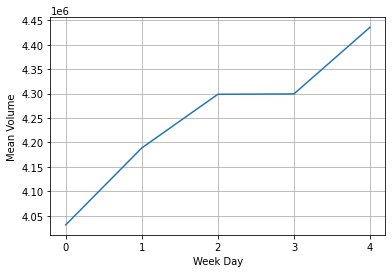

In [17]:
# Let's use a line chart to see which days have highest and lowest volumes.
x = range(0,5)
plt.plot(x,DayMean['volume'])
plt.ylabel('Mean Volume')
plt.xlabel('Week Day')
plt.xticks(x)
plt.grid()
plt.show()

Monday-0 Sunday-6

**We can see volume tends to be highest on Friday and lowest on Monday.**

**Question 3: On which date did Amazon (AMZN) see the most volatility, measured by the difference between the high and low price?**

In [18]:
AMZN_data = stock_data.loc[stock_data["symbol"]=="AMZN"]
AMZN_data

,symbol,date,open,high,low,close,volume,day
37,AMZN,2014-01-02,398.80,399.36,394.02,397.97,2140246,3
520,AMZN,2014-01-03,398.29,402.71,396.22,396.44,2213512,4
1003,AMZN,2014-01-06,395.85,397.00,388.42,393.63,3172207,0
1486,AMZN,2014-01-07,395.04,398.47,394.29,398.03,1916684,1
1969,AMZN,2014-01-08,398.47,403.00,396.04,401.92,2316903,2
...,...,...,...,...,...,...,...,...
494984,AMZN,2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,4
495489,AMZN,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,1
495994,AMZN,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,2
496499,AMZN,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,3


In [19]:
# For each date, we need to find volatility and find highest
AMZN_data['volatility'] = AMZN_data['high'] - AMZN_data['low']
AMZN_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,symbol,date,open,high,low,close,volume,day,volatility
37,AMZN,2014-01-02,398.80,399.36,394.02,397.97,2140246,3,5.34
520,AMZN,2014-01-03,398.29,402.71,396.22,396.44,2213512,4,6.49
1003,AMZN,2014-01-06,395.85,397.00,388.42,393.63,3172207,0,8.58
1486,AMZN,2014-01-07,395.04,398.47,394.29,398.03,1916684,1,4.18
1969,AMZN,2014-01-08,398.47,403.00,396.04,401.92,2316903,2,6.96


In [20]:
AMZN_data.sort_values("volatility",ascending=False)

,symbol,date,open,high,low,close,volume,day,volatility
426023,AMZN,2017-06-09,1012.50,1012.99,927.00,978.31,7647692,4,85.99
354027,AMZN,2016-11-10,778.81,778.83,717.70,742.38,12746994,3,61.13
475315,AMZN,2017-10-27,1058.14,1105.58,1050.55,1100.95,16565021,4,55.03
190913,AMZN,2015-07-24,578.99,580.57,529.35,529.42,21909381,4,51.22
486403,AMZN,2017-11-29,1194.80,1194.80,1145.19,1161.27,9257512,2,49.61
...,...,...,...,...,...,...,...,...,...
149299,AMZN,2015-03-24,373.99,375.24,372.27,374.09,2228214,1,2.97
121946,AMZN,2014-12-31,311.55,312.98,310.01,310.35,2057766,2,2.97
110722,AMZN,2014-11-26,333.78,334.65,331.75,333.57,1985949,2,2.90
50346,AMZN,2014-06-03,305.75,307.92,305.07,307.19,2379273,1,2.85


**2017-06-09 was the date AMZN had the highest volatility (highest difference between high and low price).**

**Question 4: If you could go back in time and invest in one stock from 1/2/2014 - 12/29/2017, which would you choose? What % gain would you realize?**

This question can be interpreted or approached in many ways. I will use the closing prices of the two dates. I will try finding the stocks with the lowest closing prices on 1/2/2014 and highest closing price on 12/29/2017. Then I will choose whichever stock I see has the highest percentage gain.

In [21]:
beginDate = stock_data.loc[stock_data['date']=='2014-01-02'] # filtering by date
last = beginDate.sort_values('close').head(50)

Stocks with the lowest closing prices on 1/2/2014.

In [22]:
EndDate = stock_data.loc[stock_data['date']=='2017-12-29'] # filtering by date
top = EndDate.sort_values('close',ascending=False).head(50)

Stocks with the highest closing prices on 12/29/2017.

In [23]:
list(set(top['symbol']).intersection(set(last['symbol'])))

['NVDA']

**So, we have only one stock that is common the the two series (least priced on opening date vs highest priced on closing date) and that stock is NVDA. We only need to find the percentage gain of that stock.**

In [24]:
top.loc[top['symbol']=='NVDA']

,symbol,date,open,high,low,close,volume,day
497313,NVDA,2017-12-29,198.46,198.46,193.5,193.5,6999116,4


In [25]:
last.loc[last['symbol']=='NVDA']

,symbol,date,open,high,low,close,volume,day
330,NVDA,2014-01-02,15.92,15.98,15.72,15.86,6502296,3


In [26]:
# Percentage Gain
((193.5-15.86)/15.86)*100

1120.0504413619167

**NVDA had an 1120% gain from 1/2/2014 - 12/29/2017.**

# Final Analysis

**1. 2015-08-24 saw the largest overall trading volume. 24th August, 2015 was the day of the 'flash crash'. World stock markets were down substantially. This is probably why this day has the largest overall trading volume. BAC and AAPL were the two most traded stocks of the day.**

**2. Volume tends to be highest on Fridays and lowest on Mondays. Monday is the first day of the week so factors such as investors' moods being gloomy on going back to work and due to the large amounts of bad news released in the weekends cause people to trade less on this day.**

**3. Amazon saw the most volatility on 2017-06-09. It was a Friday and as it was the last day of the week, people might have sold more shares than purchased, so price fell substantially. We can tell this as the lowest price that day was much lower than lowest price of previous day whereas highest price was quite the same.**

**4. NVIDIA's closing price on 1/2/2014 was only 15.86 and it's closing price on 12/29/2017 was 193.5. I am unsure if these prices are really accurate but according to the dataset, in about 6 years, the percentage gain was colossal (1120%). Also, NVIDIA is one of the largest GPU creators in the world. So if anyone had the ability to go back in time, they should really consider investing in this stock.**